## Introduction
##### This is a Convolutional Neural Network designed for the multiclass cassification task,I have used the keras Api(tensorflow backened) And the google colab platform for building the model.
###### Flow of the model:
      1) Dataset lodaing
      2) visualization of the data, and the intial intution
      3) CNN architeutre Modelling
      4) Data preprocessing(Normalization,Argumentation,Resizing,etc)   
      5) Plotting The Resut
      6) Final Overview
      7) Reference material

## Importing the libraires 

In [1]:
import os
import zipfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, BatchNormalization, Add# convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input# core layers
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

from platform import python_version


## Version of libraires 

In [2]:
print('phython version     : ' + (python_version()))
print('numpy version       : ' + np.__version__)
print('Tensorflow version  : ' + tf.__version__)
print('matplotlib version  : ' + matplotlib.__version__)


phython version     : 3.7.10
numpy version       : 1.19.5
Tensorflow version  : 2.4.1
matplotlib version  : 3.2.2


## Dataset Loading
##### Flow of the next cells:
     1) extracting the zip file
     2) Processing the directory and subdirectories

In [4]:
local_zip = '/content/trainPart1.zip'
zip_ref   = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/imgclassifi')
zip_ref.close()

In [5]:
train_dir = os.path.join('tmp/imgclassifi/train')
sub_dir = [os.path.join(train_dir,o) for o in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir,o))]

In [6]:
sub_dir.sort()
sub_dir

['tmp/imgclassifi/train/Sample001',
 'tmp/imgclassifi/train/Sample002',
 'tmp/imgclassifi/train/Sample003',
 'tmp/imgclassifi/train/Sample004',
 'tmp/imgclassifi/train/Sample005',
 'tmp/imgclassifi/train/Sample006',
 'tmp/imgclassifi/train/Sample007',
 'tmp/imgclassifi/train/Sample008',
 'tmp/imgclassifi/train/Sample009',
 'tmp/imgclassifi/train/Sample010',
 'tmp/imgclassifi/train/Sample011',
 'tmp/imgclassifi/train/Sample012',
 'tmp/imgclassifi/train/Sample013',
 'tmp/imgclassifi/train/Sample014',
 'tmp/imgclassifi/train/Sample015',
 'tmp/imgclassifi/train/Sample016',
 'tmp/imgclassifi/train/Sample017',
 'tmp/imgclassifi/train/Sample018',
 'tmp/imgclassifi/train/Sample019',
 'tmp/imgclassifi/train/Sample020',
 'tmp/imgclassifi/train/Sample021',
 'tmp/imgclassifi/train/Sample022',
 'tmp/imgclassifi/train/Sample023',
 'tmp/imgclassifi/train/Sample024',
 'tmp/imgclassifi/train/Sample025',
 'tmp/imgclassifi/train/Sample026',
 'tmp/imgclassifi/train/Sample027',
 'tmp/imgclassifi/train/Samp

## Intial Intution

First I have checked the data manually to get some insights of the data,the dataset contain a Train Directory & which further contain Subdirectories,after that i checkout each of the subdirectory since dataset is quite small it hardly takes me 10 min to get the insights of the data which are specified below.

    1) The dataset has 62 subdirectories, Each subdirectory has 40 images.
    2) Total images  = 62*40 = 2480.
    3) The dataset is balanced and there is no noise(arbitratry images) in the datasets
    4) The image background is White while the digits is of Balck colour
    5) The images dimension is 1200*900

## visualization Function 
This function helps up to visulaize the data on the notebook itself,its a adaptive logic,each time we run the cell we will get the different sets of images.
This function will show us the 5(this value can be change in Code) images of each types of the class in the datasets.

In [7]:
i_index = 0

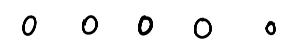

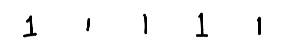

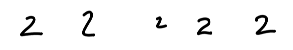

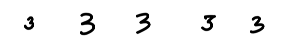

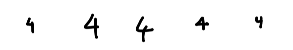

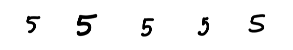

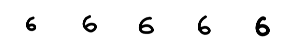

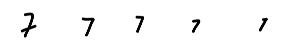

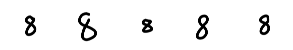

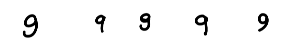

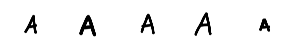

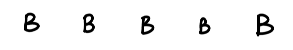

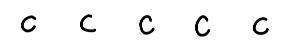

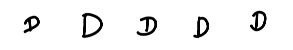

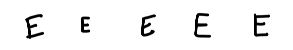

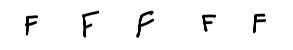

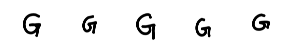

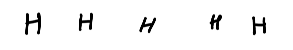

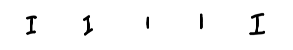

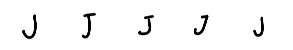

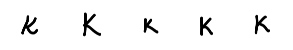

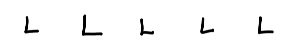

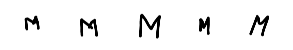

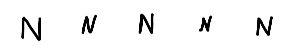

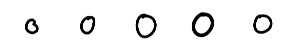

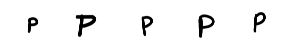

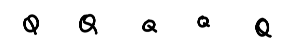

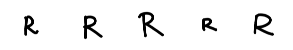

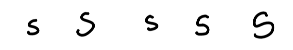

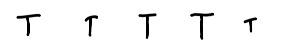

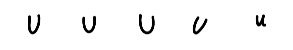

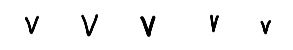

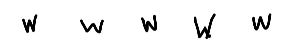

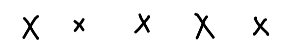

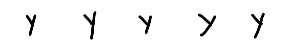

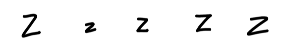

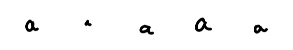

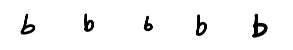

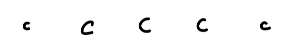

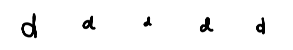

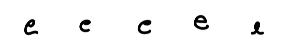

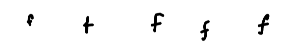

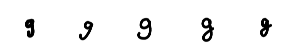

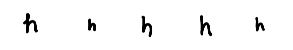

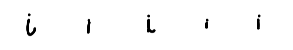

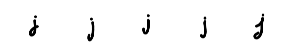

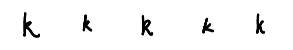

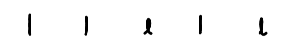

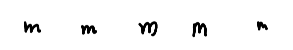

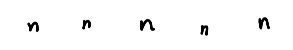

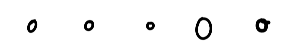

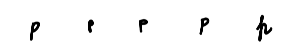

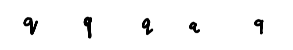

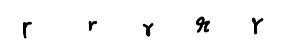

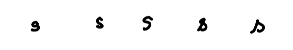

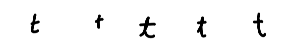

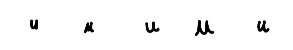

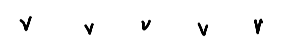

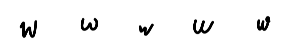

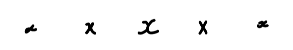

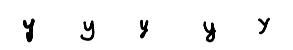

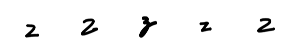

In [8]:
num_img = 5
f_index = i_index + num_img
#fig = plt.gcf()
#fig.set_size_inches(4*2,4*2)

for j in range(len(sub_dir)):
    
    fig = plt.gcf()
    fig.set_size_inches(num_img*1,num_img*1)
                        
    for i,img in enumerate(os.listdir(sub_dir[j])[i_index:f_index]):
                        
        sp = plt.subplot(num_img,num_img,i+1)
        sp.axis('off')
                        
        img_path = os.path.join(sub_dir[j],img)
        image   = mpimg.imread(img_path)
        plt.imshow(image)
                        
    plt.show()

i_index = f_index
    

## CNN

###### Defining the Model:
I used the keras functional api to create the model,I have used Five convolutional(COnv2D) layer with filter sizes 64-->64-->128-->256-->256, these layer has the ability to extract the valuable features from the images,filter is applied on a whole image,the filter size is defined by the kernel size that is (3,3), these filter extract a particular features of the images.

The next is Maxpool2D layer,which acts as a downsampling fiter,i have chosen the filter size of (2,2) for maxpooling layer,it basically looked at the neighbouring pixels and take the Max one,These are used to reduce the computational cost and overfitting of the model also.

The 3rd type of layer is dropout,which basically deactivate some of the neurons in a particular layer, It's a very handfu way to prevent overfiiting of the model.

The 4th is the Skip connection layer which I have implemented for the uninterrupted gradient flow Layers to Layers.

The other layers are the BatchNormailzation which standardizes and normalizes the input values,it helps us to mitigates the effect of unstable gradients within deep neural networks,
& the last is dense layer.


The activation function that I have used is Relu and kernel intializer is 'he_normal',

loss function is : catgorical crossentropy.

optimizer : Adam with Learning rate  = 0.01.

metrics : Accuracy.

Callbacks : 
          1)Reduce leraing rate on plateau  : to reduce the learing rate whenever the validation loss is not reducing within 3                                                 epochs by the factor of 0.5.
          2)Model checkpoint                : to save the model with the max validation accuracy.
          
###### NOTE : I have tried various various layer combination and various other techniques which didn't seem benefitting to me,I have created a compelete experiment log (jupyter notebook) which can be find on the repo By name EXPERIMENT LOG & the reference material is attached at the end of this notbook



In [14]:
def build_model():
  inp = Input(shape = (28,28,1))
  x1  = Conv2D(filters=64, kernel_size = (3,3), activation="relu",  kernel_initializer= 'he_normal')(inp)
  x1  = Conv2D(filters=64, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x1)
  x1  = MaxPooling2D(pool_size=(2,2))(x1)
  x1  = Dropout(0.20)(x1)
  x1  = BatchNormalization()(x1)

  x2  = Conv2D(filters=128, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x1)
  x2  = Conv2D(filters=256, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x2)
  x2  = MaxPooling2D(pool_size=(2,2))(x2)
  x2  = Dropout(0.25)(x2)
  x2  = BatchNormalization()(x2)


  #x3  = Add()([x1,x2])
  x3  = Conv2D(filters=256, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x2)
  #x3  = Conv2D(filters=128, kernel_size = (3,3), activation="relu")(x2)
  x3  = MaxPooling2D(pool_size=(2,2))(x3)
  x3  = Dropout(0.25)(x3)
  x3  = Flatten()(x3)
  x3  = BatchNormalization()(x3)

  x4  = Add()([x2,x3])                        # skip connection

  x4  = Dense(512,activation="relu")(x4)
  x4  = Dropout(0.20)(x4)
  out  = Dense(62,activation="softmax")(x3)   #We have 62 classes
  
  return tf.keras.Model(inp,out)



model = build_model()

rlr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)   # minimun leraing rate 0.0001
ckp = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy',verbose = 1, save_best_only = True, mode = 'max')

    
model.compile(loss="categorical_crossentropy",optimizer=tf.optimizers.Adam(learning_rate = 0.01), metrics=["accuracy"])


In [ ]:
'''


model=Sequential()

   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))    
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(62,activation="softmax"))

'''




'''
model = tf.keras.Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape =(56,56,1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(62,activation="softmax"))
'''
'''
rlr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
ckp = ModelCheckpoint('Unet_model.h5', monitor = 'val_loss',verbose = 1, save_best_only = True, mode = 'min')

    
model.compile(loss="categorical_crossentropy",optimizer=tf.optimizers.Adam(learning_rate = 0.01), metrics=["accuracy"])
'''

## Data preprocessing & Argumentation

In the next cell, I am using the keras Image Data generator for the preprocessing and Data argumentation of the data.

##### Preprocessing :
1) RESIZE: 

      DIMENSION                     : I Resize all the images to dimension (28,28).
      
      INTUTION behind the (28,28)   : I checkout the the image with various various dimesions (300 300),(150 150),(75,75),                                          (50,50),(28,28),(14,14), and i found out that with my human vision the image can easily
      classify with the dimension of 28*28 so i Choose this Dimesion).
      
      BENFIT                        : Redunce computational cost,Training Will be faster 

      INITAL DIMESION OF THE IMAGES : 1200*900
      FINAL DIMESION OF THE IMAGES  : 28*28

2) GRAYSCALE NORMALIZATION : 
To Reduce the illumination effect and for speeding the the converging process( CNN Convergerges much faster on [0..1] Data than on [0..255]

3) TRAIN-TEST SPLIT : Training 80% , Testing 20% ,Since i have a very less data so i have give 80% for training and rest for vaidating the model.

4) One hot encoding : The traingenerator will automaticaly perform the one hot encoding of the images based on the directory they are in. 

##### Agumentation : Its a very crucial step, since we have less data, argumentation will helps us to expand the dataset and  prevents the overfitting of the model.

     FOR THE DATA-ARGUMENTAION I CHOOSE   :

     1)Randomly rotate some training images by 10 degrees.
     2)Randomly Zoom by 10% some training images.
     3)Randomly shift images horizontally by 10% of the width.
     4)Randomly shift images vertically by 10% of the height.
     5)Horizontal Flip and vertical flip is set to 0,(since the (6,9)(o,Q)(1,7) etc. can be misclassified)
     
##### Batch size  = 32
##### Epouchs    =  60



In [10]:

batchsize = 32
EPOUCH    = 60

train_datagen = ImageDataGenerator(  
       
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range= 10,     
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False,
        validation_split = 0.2)



train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(28,28),  # All images will be resized to 28*28
        batch_size=batchsize,
        color_mode = "grayscale",
        class_mode='categorical',
        subset = 'training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(28,28),  # All images will be resized to 28*28
        batch_size=batchsize,
        color_mode = "grayscale",
        class_mode='categorical',
        subset = 'validation')

Found 1984 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


### Model summary

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       7385

## Training of the model

In [16]:

history = model.fit_generator(train_generator,steps_per_epoch= 1984/batchsize,epochs = EPOUCH ,verbose=1,validation_data=validation_generator, callbacks=[rlr,ckp])




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
62/62 [==============================] - 41s 644ms/step - loss: 4.4936 - accuracy: 0.0472 - val_loss: 28.2205 - val_accuracy: 0.0161

Epoch 00001: val_accuracy improved from -inf to 0.01613, saving model to best_model.h5
Epoch 2/60
62/62 [==============================] - 39s 638ms/step - loss: 3.3257 - accuracy: 0.1833 - val_loss: 5.5652 - val_accuracy: 0.1230

Epoch 00002: val_accuracy improved from 0.01613 to 0.12298, saving model to best_model.h5
Epoch 3/60
62/62 [==============================] - 39s 632ms/step - loss: 2.3430 - accuracy: 0.3422 - val_loss: 3.4928 - val_accuracy: 0.2157

Epoch 00003: val_accuracy improved from 0.12298 to 0.21573, saving model to best_model.h5
Epoch 4/60
62/62 [==============================] - 39s 635ms/step - loss: 1.8591 - accuracy: 0.4519 - val_loss: 21.2350 - val_accuracy: 0.0343

Epoch 00004: val_accuracy did not improve from 0.21573
Epoch 5/60
62/62 [==============================] - 39s 637ms/step - loss: 1.6924 - accuracy: 0.5156

## Plotting the Result

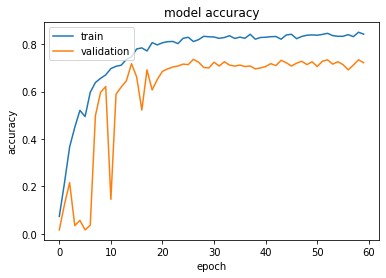

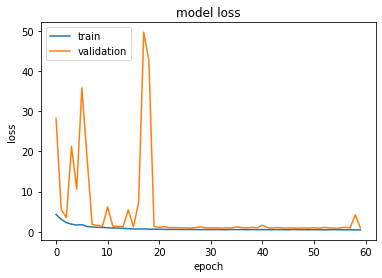

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Final overview

##### Follwing are the results i got:

#### Final Training accuracy   : 85.76%
#### Best Validation accuracy : 73.58% 

## Methods to increase the validation accuracy:
1) Use Tranfer learning 
2) Increase the ammount of data
3) Use masking,since the dataset has large white background if we apply the masking such that only the digits got cropped,this way we can make training faster.

## Refernce material

1) https://keras.io/api/
2) https://en.wikipedia.org/wiki/Convolutional_neural_network
3) https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
4) https://stackoverflow.com/questions/43290192/intuition-on-deep-residual-network
5) https://www.coursera.org/specializations/deep-learning
6) https://youtube.com/playlist?list=PLoROMvodv4rOABXSygHTsbvUz4G_YQhOb